In [111]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [34]:
import cv2
import imghdr
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [25]:
data_dir = 'data'

In [21]:
image_exts = ['jpeg','jpg','png']

In [ ]:

os.listdir(os.path.join(data_dir, 'peonies'))

In [37]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


In [38]:
import numpy as np 
from matplotlib import pyplot as plt

In [83]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 178 files belonging to 2 classes.


In [42]:
data_iterator = data.as_numpy_iterator()

In [62]:
batch = data_iterator.next()

In [49]:
batch[0].shape

(32, 256, 256, 3)

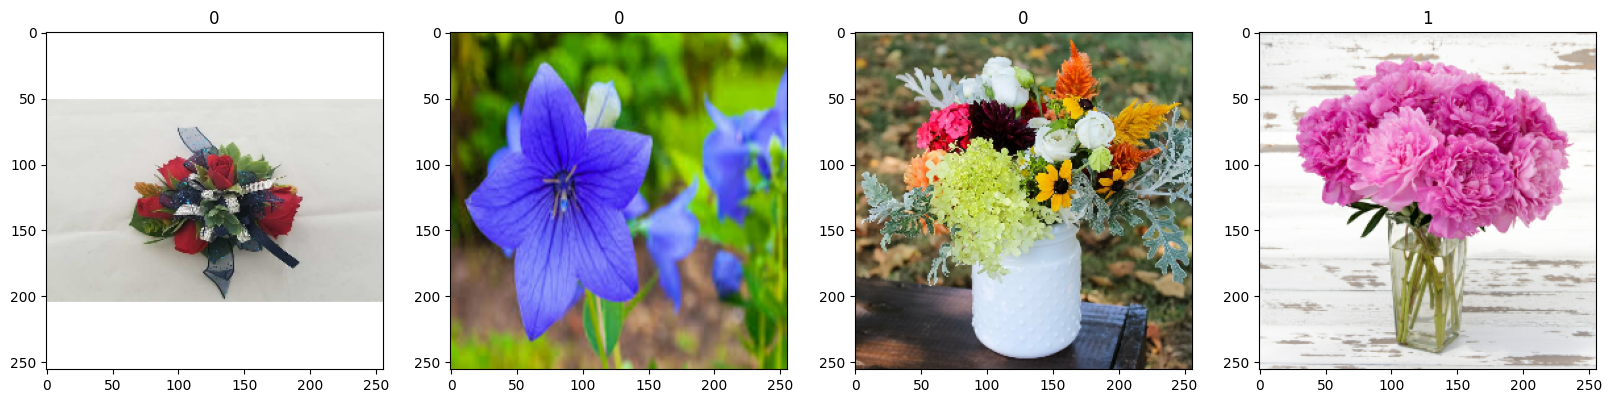

In [69]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Data

In [84]:
data = data.map(lambda x,y: (x/255,y))

In [85]:
scaled_iterator = data.as_numpy_iterator()

In [86]:
batch = scaled_iterator.next()

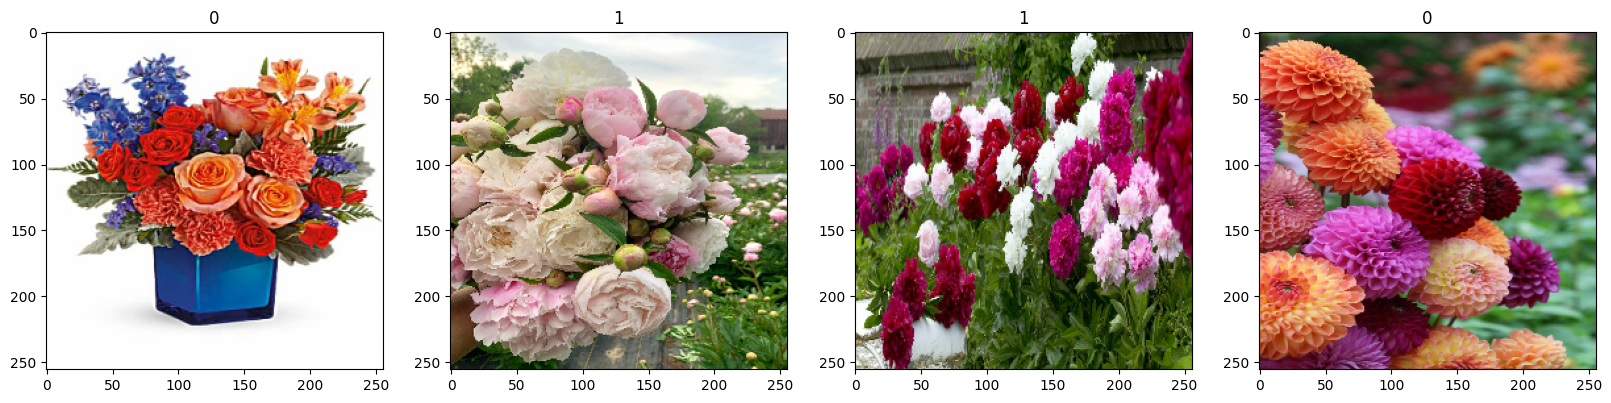

In [87]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split data

In [98]:
len(data)

6

In [105]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [107]:
val_size+train_size+test_size

6

In [108]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building model 

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [136]:
model = Sequential()

In [137]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3), name = 'conv2D'))
model.add(MaxPooling2D(name='maxpooling2D'))

model.add(Conv2D(32, (3,3), 1, activation='relu', name='conv2D_2'))
model.add(MaxPooling2D(name='maxpooling2D_2'))

model.add(Conv2D(32, (3,3), 1, activation='relu', name='conv2D_3'))
model.add(MaxPooling2D(name='maxpooling2D_3'))

model.add(Flatten(name='flatten'))

model.add(Dense(256, activation='relu', name='dense'))
model.add(Dense(1, activation='sigmoid', name='dense_1'))


In [138]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [139]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2D (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling2D (MaxPooling2D)     │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2D_2 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling2D_2 (MaxPooling2D)   │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2D_3 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpooling2D_3 (MaxPooling2D)   │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,387,649 (28.18 MB)

 Trainable params: 7,387,649 (28.18 MB)

 Non-trainable params: 0 (0.00 B)

In [140]:
logdir='logs'

In [141]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [142]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 498ms/step - accuracy: 0.4688 - loss: 2.2653 - val_accuracy: 0.5625 - val_loss: 0.8845
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - accuracy: 0.5698 - loss: 0.7793 - val_accuracy: 0.5625 - val_loss: 0.6686
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.4979 - loss: 0.6994 - val_accuracy: 0.5938 - val_loss: 0.6812
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 561ms/step - accuracy: 0.5490 - loss: 0.6859 - val_accuracy: 0.5312 - val_loss: 0.6744
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 526ms/step - accuracy: 0.5500 - loss: 0.6614 - val_accuracy: 0.6562 - val_loss: 0.6136
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 0.5740 - loss: 0.6494 - val_accuracy: 0.6875 - val_loss: 0.5488
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step - accuracy: 0.7323 - loss: 0.5786 - val_accuracy: 0.5312 - val_loss: 0.6122
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 510ms/step - accuracy: 0.6438 - loss: 0.5346 - val_accuracy: 0.7812 - val_loss:

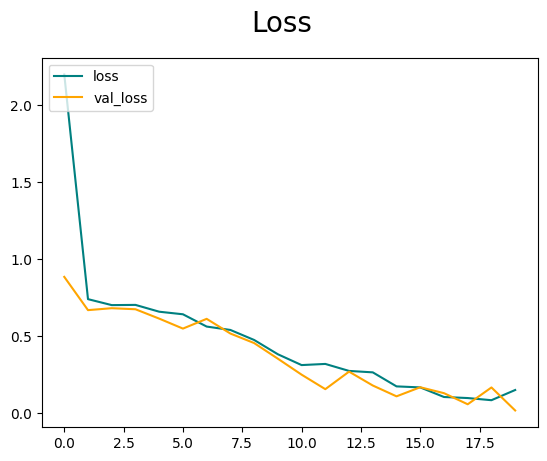

In [143]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

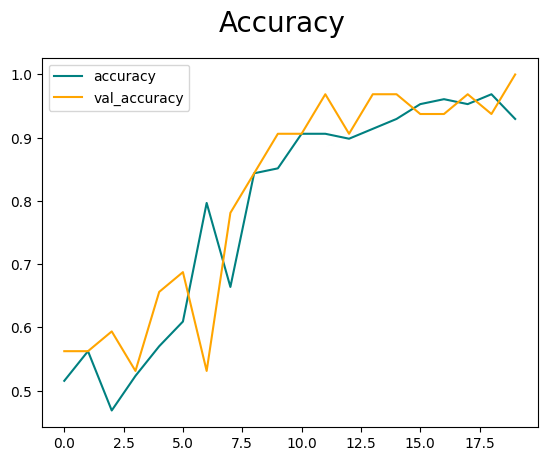

In [144]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc='upper left')
plt.show()

Evaluating Performance 

In [145]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [146]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [147]:
for batch in test.as_numpy_iterator():
    X, y=batch 
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


2024-07-06 21:04:46.039162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [148]:
print(f'Precision:{pre.result().numpy()}, Recall{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall0.8571428656578064, Accuracy:0.9444444179534912


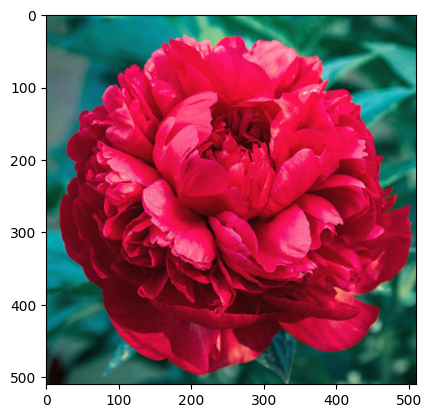

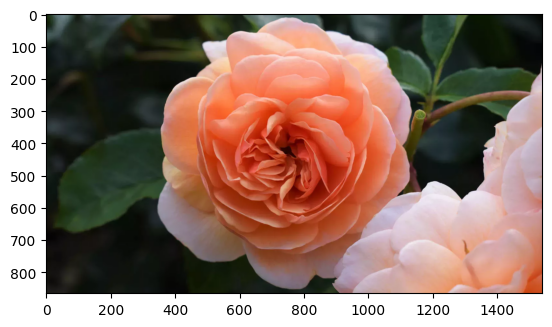

In [150]:
peonytest = cv2.imread('peonytest.jpeg')
rosetest = cv2.imread('rosetest.jpg')
plt.imshow(cv2.cvtColor(peonytest, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(rosetest, cv2.COLOR_BGR2RGB))
plt.show()


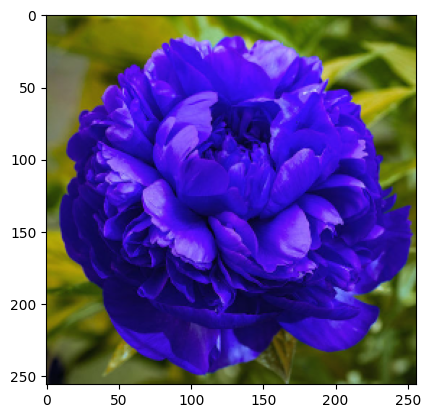

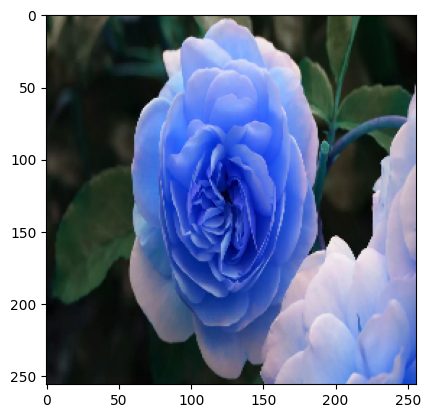

In [151]:
resizepeony = tf.image.resize(peonytest, (256,256))
resizerose = tf.image.resize(rosetest, (256,256))

plt.imshow(resizepeony.numpy().astype(int))
plt.show()
plt.imshow(resizerose.numpy().astype(int))
plt.show()


In [152]:
resizepeony.shape

TensorShape([256, 256, 3])

In [156]:
yhatpeony = model.predict(np.expand_dims(resizepeony/255, 0))
yhatrose = model.predict(np.expand_dims(resizerose/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [157]:
yhatpeony

array([[0.00451253]], dtype=float32)

In [155]:
yhatrose

array([[0.00151213]], dtype=float32)

In [159]:
peonycheck = cv2.imread('peony-pink1-3.jpg')
check = tf.image.resize(peonycheck, (256,256))
yhatcheck = model.predict(np.expand_dims(check/255, 0))
yhatcheck

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.9873843]], dtype=float32)

saving the model

In [160]:
from tensorflow.keras.models import load_model 

In [166]:
model.save(os.path.join('models', 'peonymodelv1.keras'))

In [167]:
new_model = load_model(os.path.join('models', 'peonymodelv1.keras'))

/opt/anaconda3/envs/peonyclassification/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [168]:
new_model.predict(np.expand_dims(check/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[0.9873843]], dtype=float32)